An example of intializing and running an episode of the current market implementation

In [4]:
import matplotlib.pyplot as plt
from market_model import Market

import numpy as np
import utility
from scipy.stats import norm
from scipy.optimize import curve_fit

In [5]:
"""
TODOs to investigate
- k (scaling impacts herding)
- gamma (scaling impacts herding)
- update rules (double check logic is correct)
- see if we have fat tails distribution 
- see if asymmetric preference yields a nonzero loss corelation function
"""

'\nTODOs to investigate\n- k (scaling impacts herding)\n- gamma (scaling impacts herding)\n- update rules (double check logic is correct)\n- see if we have fat tails distribution \n- see if asymmetric preference yields a nonzero loss corelation function\n'

In [6]:
N = 10000 # 100 is pretty small
alpha = 1.01 # determined from data
p = 0.0154 # fixed value used determined by another paper
M = 100 # supposedly any value 50-500 is fine
delta_R = 3 # value used in paper can also be determined from data
t_end = 100
c = 1/80

market = Market(N,alpha, p, M,t_end, delta_R)
#market = Market(N, alpha,p,M,t_end,c=c,asymmetric_preference=True)

Initializing Market


In [7]:
market.run_market()

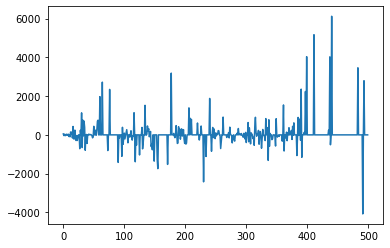

In [77]:
plt.plot(market.return_hist)

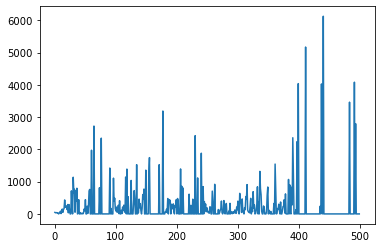

In [78]:
plt.plot(market.volatility_hist)

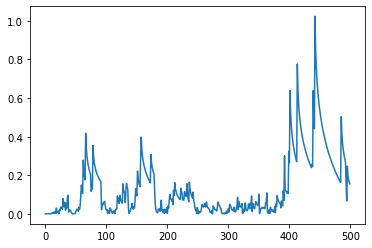

In [79]:
plt.plot(market.herding_hist)

Text(0.5, 0, 't (day)')

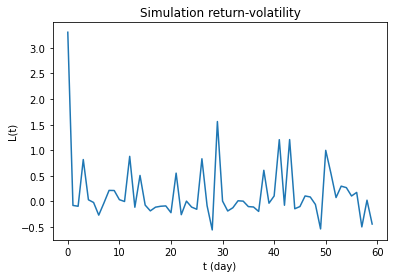

In [80]:
t_end = 60
ret_vol_cor=np.zeros(t_end)
for i in range(t_end):
    ret_vol_cor[i] = utility.calc_L(utility.calc_normalized_return(market.return_hist),i)
    #ret_vol_cor[i] = utility.calc_L(market.return_hist,i)
plt.plot(ret_vol_cor)
plt.title("Simulation return-volatility")
plt.ylabel("L(t)")
plt.xlabel("t (day)")

In [69]:
np.mean(ret_vol_cor)

3.352503228471929e-07

(array([  2.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   1.,
          4.,   2.,   9.,  14.,  58., 329.,  41.,  15.,   3.,   4.,   3.,
          4.,   0.,   2.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.]),
 array([-4388.        , -4122.48571429, -3856.97142857, -3591.45714286,
        -3325.94285714, -3060.42857143, -2794.91428571, -2529.4       ,
        -2263.88571429, -1998.37142857, -1732.85714286, -1467.34285714,
        -1201.82857143,  -936.31428571,  -670.8       ,  -405.28571429,
         -139.77142857,   125.74285714,   391.25714286,   656.77142857,
          922.28571429,  1187.8       ,  1453.31428571,  1718.82857143,
         1984.34285714,  2249.85714286,  2515.37142857,  2780.88571429,
         3046.4       ,  3311.91428571,  3577.42857143,  3842.94285714,
         4108.45714286,  4373.97142857,  4639.48571429,  4905.        ]),
 <BarContainer object of 35 artists>)

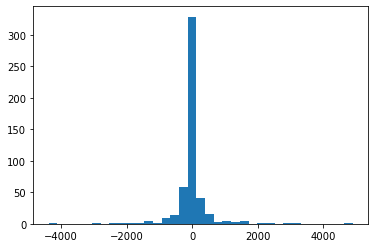

In [57]:
plt.hist(market.return_hist, bins=35)
#plt.yscale("log")

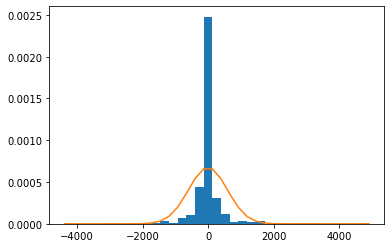

In [56]:
mu,sigma = norm.fit(market.return_hist)
count,bins, _ = plt.hist(market.return_hist, bins=35,density=True)
plt.plot(bins,norm.pdf(bins,loc=mu,scale=sigma))

In [58]:
market.return_hist

array([   47,   -35,    53,   -34,    75,   -39,   -31,    33,  -230,
          76,   149,   133,  -143,   247,   -62,     0,   205,   296,
        -240,     0,  -224,   303,   290,   -16,     0,   523,     0,
           0,  -161,  -343,   350,   -61,     0,  -226,     0,   187,
          69,  -147,   -67,     0,    48,    16,  -119,  -218,   -27,
        -250,  -390,   -63,     0,     0,     0,     0,  -271,     0,
           0,     0,   603,     0,   142,    90,  -194,  -106,    97,
          -9,   109,    96,  -110,   -42,    25,   189,   -20,     0,
         419,   280,     0, -1300,     0,  1621,     0,  3152,     0,
           0,  4905,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0, -4336,
           0,     0,   467, -2257,   351,     0,     0,     0,     0,
           0,     0,     0,  1487,     0,     0,    60,  -104,   547,
        -128,     0,  -461,   192,     0,  -122,    68,   118,     0,
          17,    34,

In [59]:
market.volatility_hist

array([  47,   35,   53,   34,   75,   39,   31,   33,  230,   76,  149,
        133,  143,  247,   62,    0,  205,  296,  240,    0,  224,  303,
        290,   16,    0,  523,    0,    0,  161,  343,  350,   61,    0,
        226,    0,  187,   69,  147,   67,    0,   48,   16,  119,  218,
         27,  250,  390,   63,    0,    0,    0,    0,  271,    0,    0,
          0,  603,    0,  142,   90,  194,  106,   97,    9,  109,   96,
        110,   42,   25,  189,   20,    0,  419,  280,    0, 1300,    0,
       1621,    0, 3152,    0,    0, 4905,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4336,
          0,    0,  467, 2257,  351,    0,    0,    0,    0,    0,    0,
          0, 1487,    0,    0,   60,  104,  547,  128,    0,  461,  192,
          0,  122,   68,  118,    0,   17,   34,    6,   50,   73,  144,
         13,   36,  388,   49,  776,    0,    0,    0,    0,    0,    0,
          0,    0,  593,    0, 2243,  104,    0,   